In [ ]:
# imdb top 1000 movies urls of all the pages (10)
url_temp = 'https://www.imdb.com/search/title/?groups=top_1000&view=simple&sort=user_rating,desc&count=100&start={}&ref_=adv_nxt'
urls = []
for i in range(1, 1001, 100):
    url = url_temp.format(str(i))
    urls.append(url)
urls

In [3]:
import requests
from bs4 import BeautifulSoup
import json

In [ ]:
# function to get page
def get_page(url):
    page = requests.get(url)
    return page

In [ ]:
# function to turn page into html content
def turn_to_soup(page):
    soup = BeautifulSoup(page.content, 'html.parser')
    return soup

In [ ]:
# function to select all movies on the pages
def parse_soup(soup):
    href_titles = soup.select('div.col-title a')
    return href_titles

In [ ]:
# function to get title only from html
def get_titles(href_titles):
    titles = []
    for title in href_titles:
        titles.append(title.text)
    return titles

In [ ]:
# combine functions to iterate through all the page urls
all_titles = []

for url in urls:
    page = get_page(url)
    soup = turn_to_soup(page)
    href_titles = parse_soup(soup)
    titles = get_titles(href_titles)
    all_titles.extend(titles)

In [ ]:
all_titles

In [ ]:
# omdb api url with api key
api_movie_url = 'http://www.omdbapi.com/?apikey=669a3fed&'

# omdb params = title of movie
api_movie_params = []
for title in all_titles:
    api_movie_params.append({'t' : title})

In [ ]:
# function to make api call
def movie_call(movie_params):
    response = requests.get(api_movie_url, params=movie_params)
    movie_data = response.json()
    return movie_data

In [ ]:
# # try out movie_call function
# movie_call(api_movie_params[2])

In [ ]:
# function to parse movie data
def parse_movie_data(movie_data):
    parsed_movie_data = []
    for data in movie_data:
        if 'Title' not in data.keys():
            data.setdefault('Title', None)
        if 'Genre' not in data.keys():
            data.setdefault('Genre', None)
        if 'Director' not in data.keys():
            data.setdefault('Director', None)
        if 'Actors' not in data.keys():
            data.setdefault('Actors', None)
        if 'Metascore' not in data.keys():
            data.setdefault('Metascore', None)
        if 'imdbRating' not in data.keys():
            data.setdefault('imdbRating', None)
        if 'imdbID' not in data.keys():
            data.setdefault('imdbID', None)
        if 'Production' not in data.keys():
            data.setdefault('Production', None)
        mov_tuple = (data['Title'], data['Genre'], data['Director'], data['Actors'], data['Metascore'], data['imdbRating'], data['imdbID'], data['Production'])
        parsed_movie_data.append(mov_tuple)
    return parsed_movie_data

In [ ]:
# combine call and parse functions to loop through all movie titles
movie_data_total = []
for param in api_movie_params:
    movie_data = movie_call(param)
    movie_data_total.append(movie_data)
    parsed_movie_data = parse_movie_data(movie_data_total)

In [ ]:
# # print all parsed movie data
# parsed_movie_data

In [6]:
!pip install mysql-connector-python

     |████████████████████████████████| 4.5MB 2.7MB/s eta 0:00:01
     |████████████████████████████████| 1.4MB 5.2MB/s eta 0:00:01


In [66]:
import mysql.connector 
import config

cnx = mysql.connector.connect(
    host = config.host,
    user = config.user,
    passwd = config.pw
)
cursor = cnx.cursor()


# # create new DB 
# cursor.execute("CREATE DATABASE movies")

cnx.database = 'movies'

In [ ]:
# create tables for the movies
# create_table_all = """
#     CREATE TABLE movies_all (
#     movieID int AUTO_INCREMENT,
#     title varchar(255),
#     genre varchar(255),
#     director varchar(255),
#     actors varchar(255),
#     metascore FLOAT,
#     imdb_rating FLOAT,
#     imdbID varchar(255),
#     production varchar(255),
#     PRIMARY KEY (movieID)
#     );"""

# create_table_movies = """
#     CREATE TABLE movies (
#     moviesID int AUTO_INCREMENT,
#     title varchar(255),
#     genre varchar(255),
#     imdbID varchar(255),
#     movieID int,
#     PRIMARY KEY (moviesID),
#     FOREIGN KEY (movieID) REFERENCES movies_all (movieID)
#     );"""

# create_table_production = """
#     CREATE TABLE production (
#     productionID int AUTO_INCREMENT,
#     director varchar(255),
#     actors varchar(255),
#     production varchar(255),
#     movieID int,
#     PRIMARY KEY (productionID),
#     FOREIGN KEY (movieID) REFERENCES movies_all (movieID)
#     );"""

# create_table_ratings = """
#     CREATE TABLE ratings (
#     ratingsID int AUTO_INCREMENT,
#     metascore FLOAT,
#     imdb_rating FLOAT,
#     movieID int,
#     PRIMARY KEY (ratingsID),
#     FOREIGN KEY (movieID) REFERENCES movies_all (movieID)
#     );"""

# create_table_movies_all2 = """
#     CREATE TABLE movies_all2 (
#     title varchar(100),
#     movieID2 int,
#     release_date DATE,
#     popularity FLOAT,
#     budget int,
#     genre varchar(100),
#     revenue FLOAT,
#     vote_avg FLOAT,
#     vote_count int,
#     imdbID varchar(50)
#     );"""

In [ ]:
create_table_movies_master = """
    CREATE TABLE movies_master (
    title varchar(100),
    movieID2 int,
    release_date DATE,
    popularity FLOAT,
    budget int,
    genre varchar(100),
    revenue FLOAT,
    vote_avg FLOAT,
    vote_count int,
    imdbID varchar(50)
    );"""

In [ ]:
# # create tables in DB

# cursor.execute(create_table_all)
# cursor.execute(create_table_movies)
# cursor.execute(create_table_production)
# cursor.execute(create_table_ratings)
# cursor.execute(create_table_movies_all2)

In [ ]:
# write function to input all data into DB

insert_all_data = """
    INSERT INTO movies_all (
    title,
    genre,
    director,
    actors,
    metascore,
    imdb_rating,
    imdbID,
    production)
    VALUES (%s, %s, %s, %s, %s, %s, %s, %s);"""

In [ ]:
# # insert data into all data table
# cursor.executemany(insert_all_data, parsed_movie_data)
# cnx.commit()

In [ ]:
# write a function to take parsed data and insert it into DB

insert_movies = """
    INSERT INTO movies (
    title, genre, imdbID, movieID)
    VALUES (%s, %s, %s, %s);"""

insert_production = """
    INSERT INTO production (
    director, actors, production, movieID)
    VALUES (%s, %s, %s, %s);"""

insert_ratings = """
    INSERT INTO ratings (
    metascore, imdb_rating, movieID)
    VALUES (%s, %s, %s);"""

In [ ]:
# # insert data into movies table
# movies_table_data = cursor.execute("""SELECT title, genre, imdbID, movieID FROM movies_all;""")
# cursor.executemany(insert_movies, cursor.fetchall())
# cnx.commit()

In [ ]:
# # insert data into producion table
# production_table_data = cursor.execute("""SELECT director, actors, production, movieID FROM movies_all;""")
# cursor.executemany(insert_production, cursor.fetchall())
# cnx.commit()

In [ ]:
# # insert data into ratings table
# ratings_table_data = cursor.execute("""SELECT metascore, imdb_rating, movieID FROM movies_all;""")
# cursor.executemany(insert_ratings, cursor.fetchall())
# cnx.commit()

In [67]:
import pandas as pd

In [71]:
#join master tables
cursor.execute("""
    SELECT movieID, a.title, genres, director, actors, metascore, imdb_rating, production, release_date, popularity, budget, genre, revenue, vote_avg, vote_count
    FROM movies.movies_all a
    JOIN movies.movies_all2 b
    ON a.imdbID = b.imdbID;""")

#create dataframe for master table
movies_all = cursor.fetchall()
df = pd.DataFrame(movies_all)
df.columns = [i[0] for i in cursor.description]
df = df.set_index('movieID')
df

,title,genres,director,actors,metascore,imdb_rating,production,release_date,popularity,budget,genre,revenue,vote_avg,vote_count
movieID,,,,,,,,,,,,,,
1,The Shawshank Redemption,Drama,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",80.0,9.3,Columbia Pictures,1994-09-23,35.464,25000000,Drama,2.834150e+07,8.7,14400
2,The Godfather,"Crime, Drama",Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Richard ...",100.0,9.2,Paramount Pictures,1972-03-14,30.990,6000000,Drama,2.450660e+08,8.6,11033
3,The Dark Knight,"Action, Crime, Drama, Thriller",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",84.0,9.0,Warner Bros. Pictures/Legendary,2008-07-16,42.304,185000000,Drama,1.004560e+09,8.4,20399
4,The Godfather: Part II,"Crime, Drama",Francis Ford Coppola,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",90.0,9.0,Paramount Pictures,1974-12-20,28.912,13000000,Drama,1.026000e+08,8.5,6479
5,The Lord of the Rings: The Return of the King,"Adventure, Drama, Fantasy",Peter Jackson,"Noel Appleby, Ali Astin, Sean Astin, David Aston",94.0,8.9,New Line Cinema,2003-12-01,35.139,94000000,Adventure,1.118890e+09,8.4,14214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,The Town,"Crime, Drama, Thriller",Ben Affleck,"Ben Affleck, Rebecca Hall, Jon Hamm, Jeremy Re...",74.0,7.5,Warner Bros. Pictures,2010-09-15,14.325,37000000,Crime,1.540260e+08,7.1,2609
995,Kung Fu Panda,"Animation, Action, Adventure, Comedy, Family","Mark Osborne, John Stevenson","Jack Black, Dustin Hoffman, Angelina Jolie, Ia...",73.0,7.5,Paramount Pictures,2008-06-04,18.616,130000000,Adventure,6.317450e+08,7.1,6644
996,Munich,"Biography, Crime, Drama, History, Thriller",Steven Spielberg,"Eric Bana, Daniel Craig, Ciarán Hinds, Mathieu...",74.0,7.5,Universal Pictures,2005-12-23,12.359,70000000,Drama,1.303590e+08,7.1,1349


In [5]:
cursor.execute("""
    SELECT director, AVG(imdb_rating) AS avg_rating
    FROM movies.movies_all
    GROUP BY director
    HAVING COUNT(director) > 2
    ORDER BY AVG(imdb_rating) DESC;""")

dir_rating = cursor.fetchall()
director_rating = pd.DataFrame(dir_rating)
director_rating.columns = [i[0] for i in cursor.description]
director_rating.head(21)

,director,avg_rating
0,N/A,8.500000
1,Christopher Nolan,8.475000
2,Charles Chaplin,8.400000
3,Francis Ford Coppola,8.400000
4,Sergio Leone,8.283333
5,Rajkumar Hirani,8.266666
6,Stanley Kubrick,8.225000
7,Quentin Tarantino,8.212500
8,Frank Capra,8.200000
9,Akira Kurosawa,8.200000


In [72]:
cursor.execute("""
    SELECT title, genres
    FROM movies.movies_all
    WHERE genres LIKE '%family%';""")

df3 = cursor.fetchall()
df3 = pd.DataFrame(df3)
df3.columns = [i[0] for i in cursor.description]
df3.head(30)

,title,genres
0,Spirited Away,"Animation, Adventure, Family, Fantasy, Mystery"
1,It's a Wonderful Life,"Drama, Family, Fantasy"
2,The Lion King,"Animation, Adventure, Drama, Family, Musical"
3,Modern Times,"Comedy, Drama, Family, Romance"
4,Spider-Man: Into the Spider-Verse,"Animation, Action, Adventure, Family, Sci-Fi"
5,Coco,"Animation, Adventure, Family, Fantasy, Music, ..."
6,WALL·E,"Animation, Adventure, Family, Sci-Fi"
7,Toy Story 3,"Animation, Adventure, Comedy, Family, Fantasy"
8,Children of Heaven,"Drama, Family, Sport"
9,Toy Story,"Animation, Adventure, Comedy, Family, Fantasy"


In [6]:
# look at what movies were created by directors with average high ratings
cursor.execute("""
    SELECT director, title, genres
    FROM movies.movies_all
    GROUP BY director
    HAVING COUNT(director) > 2
    ORDER BY AVG(imdb_rating) DESC;
    ;""")

df1 = cursor.fetchall()
df1 = pd.DataFrame(df1)
df1

,0,1,2
0,N/A,The Killing,"Crime, Drama, Mystery, Thriller"
1,Christopher Nolan,The Dark Knight,"Action, Crime, Drama, Thriller"
2,Charles Chaplin,The Great Dictator,"Comedy, Drama, War"
3,Francis Ford Coppola,The Godfather,"Crime, Drama"
4,Sergio Leone,"The Good, the Bad and the Ugly",Western
...,...,...,...
88,Ben Affleck,Argo,"Biography, Drama, Thriller"
89,Zack Snyder,Dawn of the Dead,"Action, Horror"
90,Michael Haneke,Amour,"Drama, Romance"
91,Tim Burton,Big Fish,"Adventure, Drama, Fantasy, Romance"


In [7]:
top20_directors = []
for i in range(1, 21):
    directors = director_rating.director.values[i]
    top20_directors.append(directors)

top20_directors

['Christopher Nolan',
 'Charles Chaplin',
 'Francis Ford Coppola',
 'Sergio Leone',
 'Rajkumar Hirani',
 'Stanley Kubrick',
 'Quentin Tarantino',
 'Frank Capra',
 'Akira Kurosawa',
 'Peter Jackson',
 'Martin Scorsese',
 'Bong Joon Ho',
 'Bryan Singer',
 'Andrei Tarkovsky',
 'Billy Wilder',
 'Ingmar Bergman',
 'Anthony Russo, Joe Russo',
 'Robert Zemeckis',
 'David Lean',
 'Hayao Miyazaki']

In [8]:
(df[df['director'] == "Christopher Nolan"])[['title', 'genres']]

,title,genres
movieID,,
3,The Dark Knight,"Action, Crime, Drama, Thriller"
9,Inception,"Action, Adventure, Sci-Fi, Thriller"
23,Interstellar,"Adventure, Drama, Sci-Fi"
39,The Prestige,"Drama, Mystery, Sci-Fi, Thriller"
66,The Dark Knight Rises,"Action, Thriller"
72,Memento,"Mystery, Thriller"
155,Batman Begins,"Action, Adventure"
451,Dunkirk,"Action, Drama, History, Thriller, War"


In [9]:
director_df = []
for director in top20_directors:
    director = (df[df['director'] == director])[['director','title', 'genres']]
    director_df.append(director)

In [31]:
director_df[11]

,director,title,genres
movieID,,,
21,Bong Joon Ho,Parasite,"Comedy, Drama, Thriller"
236,Bong Joon Ho,Memories of Murder,"Action, Crime, Drama, Mystery, Thriller"
585,Bong Joon Ho,Mother,"Crime, Drama, Thriller"


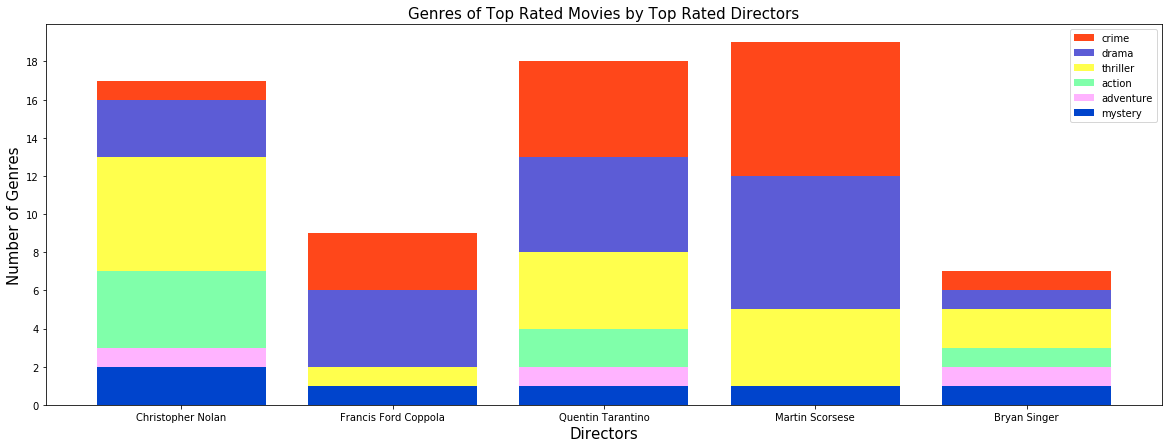

In [65]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,7))

directors = ['Christopher Nolan', 'Francis Ford Coppola', 'Quentin Tarantino', 'Martin Scorsese', 'Bryan Singer']
crime = np.array([1, 3, 5, 7, 1])
drama = np.array([3, 4, 5, 7, 1])
thriller = np.array([6, 1, 4, 4, 2])
action = np.array([4, 0, 2, 0, 1])
adventure = np.array([1, 0, 1, 0, 1])
mystery = ([2, 1, 1, 1, 1])
ind = np.arange(5)

plt.bar(ind, crime, width=0.8, label='crime', color='#ff471a', bottom=drama+thriller+action+adventure+mystery)
plt.bar(ind, drama, width=0.8, label='drama', color='#5c5cd6', bottom=thriller+action+adventure+mystery)
plt.bar(ind, thriller, width=0.8, label='thriller', color='#ffff4d', bottom=action+adventure+mystery)
plt.bar(ind, action, width=0.8, label='action', color='#80ffaa', bottom=adventure+mystery)
plt.bar(ind, adventure, width=0.8, label='adventure', color='#ffb3ff', bottom=mystery)
plt.bar(ind, mystery, width=0.8, label='mystery', color='#0044cc')

plt.xticks(ind, directors)
plt.ylabel("Number of Genres", fontsize=15)
plt.xlabel("Directors", fontsize=15)
plt.legend(loc="upper right")
plt.title("Genres of Top Rated Movies by Top Rated Directors", fontsize=15)
ax.yaxis.set_ticks(np.arange(0, 20, 2))

plt.show()
